# Linear Regression (Chapter 3 ISLR book)

- [Load Datasets](#Load-Datasets)
- [3.1 Simple Linear Regression](#3.1-Simple-Linear-Regression)
- [3.2 Multiple Linear Regression](#3.2-Multiple-Linear-Regression)
- [3.3 Other Considerations in the Regression Model](#3.3-Other-Considerations-in-the-Regression-Model)
    - [3.3.1 Collinearity](#3.3.1-Collinearity)
    - [3.3.2 Qualitative/Categorical Variables](#3.3.2-Qualitative/Categorical-Variables)
    - [3.3.3 Interactions](3.3.3 Interactions)
    - [3.3.4 Non-linear relationships](#3.3.4-Non-linear-relationships)
    - [3.3.5 Outliers](#3.3.5-Outliers)
- [3.4 Model Complexity](#3.4-Model-Complexity)

In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

### Load Datasets
Datasets available on http://www-bcf.usc.edu/~gareth/ISL/data.html

In [2]:
advertising = pd.read_csv('data/Advertising.csv', usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [81]:
credit = pd.read_csv('data/Credit.csv', usecols=list(range(1,12)))
credit['Student2'] = credit.Student.map({'No':0, 'Yes':1})
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Student2
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0


In [99]:
auto = pd.read_csv('data/Auto.csv', na_values='?').dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
 9   Manufacturer  392 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 33.7+ KB


## 3.1 Simple Linear Regression

### Figure 3.1 - Least squares fit

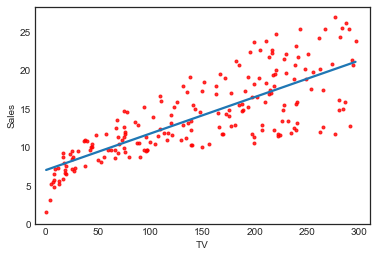

In [6]:
# Plot data and a linear regression model fit
# How strong is the relationship betw. advertising budget and sales
sns.regplot(advertising.TV, advertising.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(ymin=0);

### Figure 3.2 - Regression coefficients - RSS
Note that the text in the book describes the coefficients based on uncentered data, whereas the plot shows the model based on centered data. The latter is visually more appealing for explaining the concept of a minimum RSS. I think that, in order not to confuse the reader, the values on the axis of the B0 coefficients have been changed to correspond with the text. The axes on the plots below are unaltered.

In [7]:
# Standardize a dataset along any axis
# sales ≈ β0 + β1 × TV regression coefficient or parameters
X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)
#plt.hist(X)
#X.ravel()
np.corrcoef(advertising.TV, advertising.Sales)

array([[1.        , 0.78222442],
       [0.78222442, 1.        ]])

In [8]:
#what data structures does the fit function want?
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X, np.array([1, 2])) + 3
reg = skl_lm.LinearRegression().fit(X, y)
reg.coef_
type(y)

numpy.ndarray

In [9]:
X

array([[1, 1],
       [1, 2],
       [2, 2],
       [2, 3]])

In [10]:
y

array([ 6,  8,  9, 11])

In [17]:
# Regression coefficients (Ordinary Least Squares)
regr = skl_lm.LinearRegression()

#X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)
# added values
X=advertising.TV.values.reshape(-1,1)
y = advertising.Sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)
y_pred = regr.predict(X)

7.032593549127695
[0.04753664]


In [6]:
print(regr.score(X, y))

0.611875050850071


In [11]:
# Compute the RSS value for this parameterization of the model
# rss = np.sum(np.square(y - regr))
# print("RSS = {}".format(rss))

### Tasks

1. Compute the residuals, their sum and RSS (are they different for non-centered X?)
2. Compute $R^2$ and compare with the correlation coefficient $\rho$.
3. Interpret the meaning of the slope $\hat{\beta_1}$.
4. Obtain $SE(\hat{\beta_1})$ and a 95% confidence interval for the slope.
5. Discuss how one could use resampling to obtain non-parametric confidence intervals
6. (homework) Test whether the true slope could be 0.

## Least Squares

Is RSS really minimized ?


In [45]:
1-(np.sum(res**2)/TSS)

3842920434547657.5

In [47]:
TSS

-5.471179065352771e-13

In [46]:
np.var(y.values)*199

5390.06300625

In [31]:
# Compute the residuals. We need yHat, y, intercept, coef
yHat = regr.intercept_ + regr.coef_*X
residual = y.values.reshape(-1,1) - yHat
# their sum 
sum_residuals = np.sum(residual)
print(sum_residuals)
# and RSS resiudals sum of squares (are they different for non-centered X?)
rss = np.sum(residual)**2

-2.8421709430404007e-13


In [32]:
# Compute  𝑅2  and compare with the correlation coefficient  𝜌 .
# TSS total sum of squares = variance of y
print("RSS/TSS:", RSS/(np.var(y.values)*199))
R2 = 1-np.sum(res**2)/(np.var(y.values)*199)
print("R2:", R2)
r=np.corrcoef(advertising.TV, advertising.Sales)
print("corr coeff:", r)


# confidence_interval = 2.58*std_err

RSS/TSS: 0.39007532577882303
R2: 0.609924674221177
corr coeff: [[1.         0.78222442]
 [0.78222442 1.        ]]


In [62]:
#Obtain  𝑆𝐸(𝛽1^)  and a 99% confidence interval for the slope.
est = smf.ols('Sales ~ TV', advertising).fit()
est.summary(alpha=0.01).tables[1] 

,coef,std err,t,P>|t|,[0.005,0.995]
Intercept,7.0326,0.458,15.360,0.000,5.842,8.223
TV,0.0475,0.003,17.668,0.000,0.041,0.055


In [69]:
est.conf_int(0.01)

,0,1
Intercept,5.841796,8.223391
TV,0.040539,0.054535


In [49]:
SSx=np.var(X)*199
#variance of residuals
s2 = RSS/(199-2)
SE = s2/SSx
print("SE:", SE)

SE: 7.312678487497327e-06


In [66]:
from scipy.stats import norm
regr.intercept_ - norm.ppf(0.995,199) * SE

7.031119489897147

In [68]:
-0.0475 - norm.ppf(0.995,199)*0.003

-0.6522274879106468

In [100]:
-0.0475 + norm.ppf(0.995,199)*0.003

0.5572274879106468

In [17]:
# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)/1000
min_rss

2.1025305831313514

In [9]:
# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50)
B1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = np.sum((xx[i,j] + yy[i,j]*X - y.values.reshape(-1,1))**2)/1000
 #   Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000

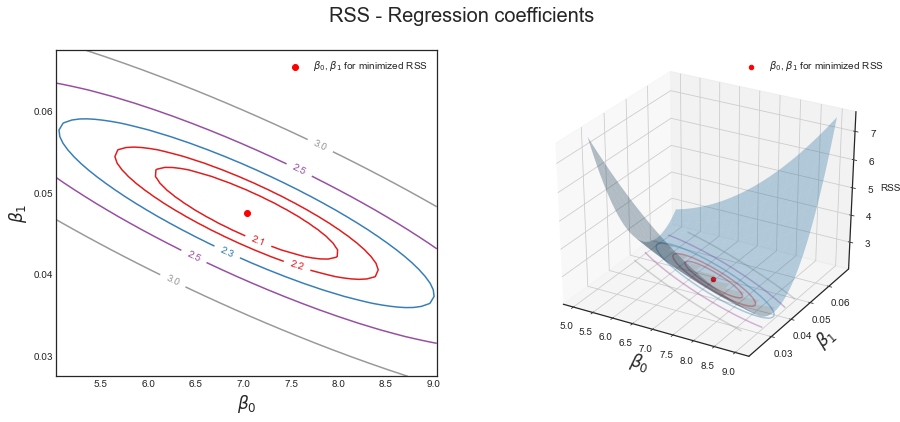

In [19]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.02,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()

### Confidence interval on page 67 & Table 3.1 & 3.2 - Statsmodels 

In [20]:
est = smf.ols('Sales ~ TV', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [21]:
# RSS with regression coefficients
((advertising.Sales - (est.params[0] + est.params[1]*advertising.TV))**2).sum()/1000

2.1025305831313514

### Table 3.1 & 3.2 - Scikit-learn

![p.68](figures/ISLR-Table3.1.png)

![p.69](figures/ISLR-Table3.2.png)

In [22]:
regr = skl_lm.LinearRegression()

X = advertising.TV.values.reshape(-1,1)
y = advertising.Sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

7.032593549127693
[0.04753664]


In [70]:
Sales_pred = regr.predict(X)
r2_score(y, Sales_pred)

0.611875050850071

## 3.2 Multiple Linear Regression

How can we extend our analysis of the advertising data in order
to accommodate these two additional predictors?
One option is to run three separate simple linear regressions, each of
which uses a different advertising medium as a predictor.

However, the approach of fitting a separate simple linear regressionmodel
for each predictor is not entirely satisfactory. First of all, it is unclear how to
make a single prediction of sales given levels of the three advertising media
budgets, since each of the budgets is associated with a separate regression
equation. Second, each of the three regression equations ignores the other
two media in forming estimates for the regression coefficients. We will see
shortly that if the media budgets are correlated with each other in the 200
markets that constitute our data set, then this can lead to very misleading
estimates of the individual media effects on sales.
Instead of fitting a separate simple linear regression model for each predictor,
a better approach is to extend the simple linear regression model
(3.5) so that it can directly accommodate multiple predictors. We can do
this by giving each predictor a separate slope coefficient in a single model.
In general, suppose that we have p distinct predictors. Then the multiple
linear regression model takes the form
$$
Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon 
$$

We interpret $\beta_j$ as the average effect on Y of a one unit increase in $X_j$, **holding all other predictors fixed**.


### Table 3.3 - Statsmodels

In [24]:
est = smf.ols('Sales ~ Radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
Radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [25]:
est = smf.ols('Sales ~ Newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


In [26]:
est = smf.ols('Sales ~ TV', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


### Table 3.4 & 3.6 - Statsmodels

We interpret these results as follows: for a given
amount of TV and newspaper advertising, spending an additional $1,000
on radio advertising leads to an increase in sales by approximately 189
units. Comparing these coefficient estimates to those displayed in Tables 3.1
and 3.3, we notice that the multiple regression coefficient estimates for
TV and radio are pretty similar to the simple linear regression coefficient
estimates. However, while the newspaper regression coefficient estimate in
Table 3.3 was significantly non-zero, the coefficient estimate for newspaper
in the multiple regression model is close to zero, and the corresponding
p-value is no longer significant, with a value around 0.86. This illustrates that the simple and multiple regression coefficients can be quite different.
This difference stems from the fact that in the simple regression case, the
slope term represents the average effect of a 1,000 increase in newspaper
advertising, ignoring other predictors such as TV and radio. In contrast, in
the multiple regression setting, the coefficient for newspaper represents the
average effect of increasing newspaper spending by 1,000 **while holding TV and radio fixed**.

In [27]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           1.58e-96
Time:                        21:32:41   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Table 3.5 - Correlation Matrix

Does it make sense for the multiple regression to suggest no relationship
between sales and newspaper while the simple linear regression implies the
opposite? In fact it does. Consider the correlation matrix for the three
predictor variables and response variable, displayed in Table 3.5. Notice
that the correlation between radio and newspaper is 0.35. This reveals a
tendency to spend more on newspaper advertising in markets where more
is spent on radio advertising. Now suppose that the multiple regression is
correct and newspaper advertising has no direct impact on sales, but radio
advertising does increase sales. Then in markets where we spend more
on radio our sales will tend to be higher, and as our correlation matrix
shows, we also tend to spend more on newspaper advertising in those same
markets. Hence, in a simple linear regression which only examines sales
versus newspaper, we will observe that higher values of newspaper tend to be
associated with higher values of sales, even though newspaper advertising
does not actually affect sales. So newspaper sales are a surrogate for radio
advertising; newspaper gets “credit” for the effect of radio on sales.
This slightly counterintuitive result is very common in many real life
situations. Consider an absurd example to illustrate the point. Running
a regression of shark attacks versus ice cream sales for data collected at
a given beach community over a period of time would show a positive
relationship, similar to that seen between sales and newspaper. Of course
no one (yet) has suggested that ice creams should be banned at beaches
to reduce shark attacks. In reality, higher temperatures cause more people
to visit the beach, which in turn results in more ice cream sales and more
shark attacks. A multiple regression of attacks versus ice cream sales and
temperature reveals that, as intuition implies, the former predictor is no
longer significant after adjusting for temperature.

In [28]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


### Figure 3.5 - Multiple Linear Regression

![p.81](figures/ISLR-Fig3.5.png)

In [72]:
regr = skl_lm.LinearRegression()

X = advertising[['Radio', 'TV']]#.as_matrix()
y = advertising.Sales

regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

[0.18799423 0.04575482]
2.921099912405138


In [73]:
# What are the min/max values of Radio & TV?
# Use these values to set up the grid for plotting.
advertising[['Radio', 'TV']].describe()

,Radio,TV
count,200.000000,200.000000
mean,23.264000,147.042500
std,14.846809,85.854236
min,0.000000,0.700000
25%,9.975000,74.375000
50%,22.900000,149.750000
75%,36.525000,218.825000
max,49.600000,296.400000


In [74]:
# Create a coordinate grid
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])

<ipython-input-75-ec65fcceab96>:13: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  ax.set_ylim(ymin=0)


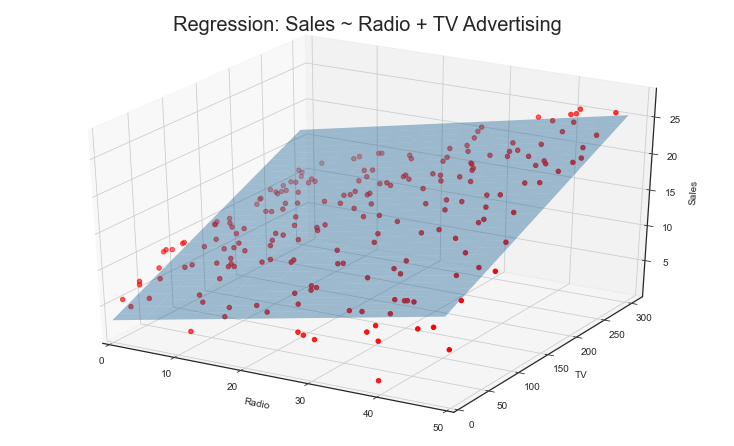

In [75]:
# Create plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(advertising.Radio, advertising.TV, advertising.Sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales');

## 3.3 Other Considerations in the Regression Model

-----------------------------------------------------------
### 3.3.1 Collinearity

#### "Exact Collinearity" 


##### Tasks

1. You try to impress your investors with the number of advertising channels that you have investigated. So you make a copy of the TV column, call it *facebook* and refit the linear multiple regression.

2. **Multi-Collinearity**: You have learned from your foolish mistakes and are more ambitiously creating *fake data*: You create a new column *instagram* by adding TV and Radio and subtracting 3 times Newspaper. Now, refit the linear multiple regression.



In [76]:
advertising["facebook"] = advertising.TV
advertising.info()

est = smf.ols('Sales ~ TV + Radio + Newspaper + facebook', advertising).fit()
est.summary()

advertising["instagram"] = advertising.TV +advertising.Radio - 3*advertising.Newspaper
advertising.info()

est = smf.ols('Sales ~ TV + Radio + Newspaper + instagram', advertising).fit()
est.summary()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
 4   facebook   200 non-null    float64
dtypes: float64(5)
memory usage: 7.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
 4   facebook   200 non-null    float64
 5   instagram  200 non-null    float64
dtypes: float64(6)
memory usage: 9.5 KB


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 20 Dec 2020   Prob (F-statistic):           1.58e-96
Time:                        13:58:30   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0260      0.002     11.660      0.000       0.022       0.030
Radio          0.1687      0.008     22.469      0.000       0.154       0.184
Newspaper      0.0583      0.002     27.223      0.000       0.054       0.063
instagram      0.0198      0.002     10.679      0.000       0.016       0.023
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                     2.33e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.59e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""


#### Figure 3.6

What about non-exact collinaerities?

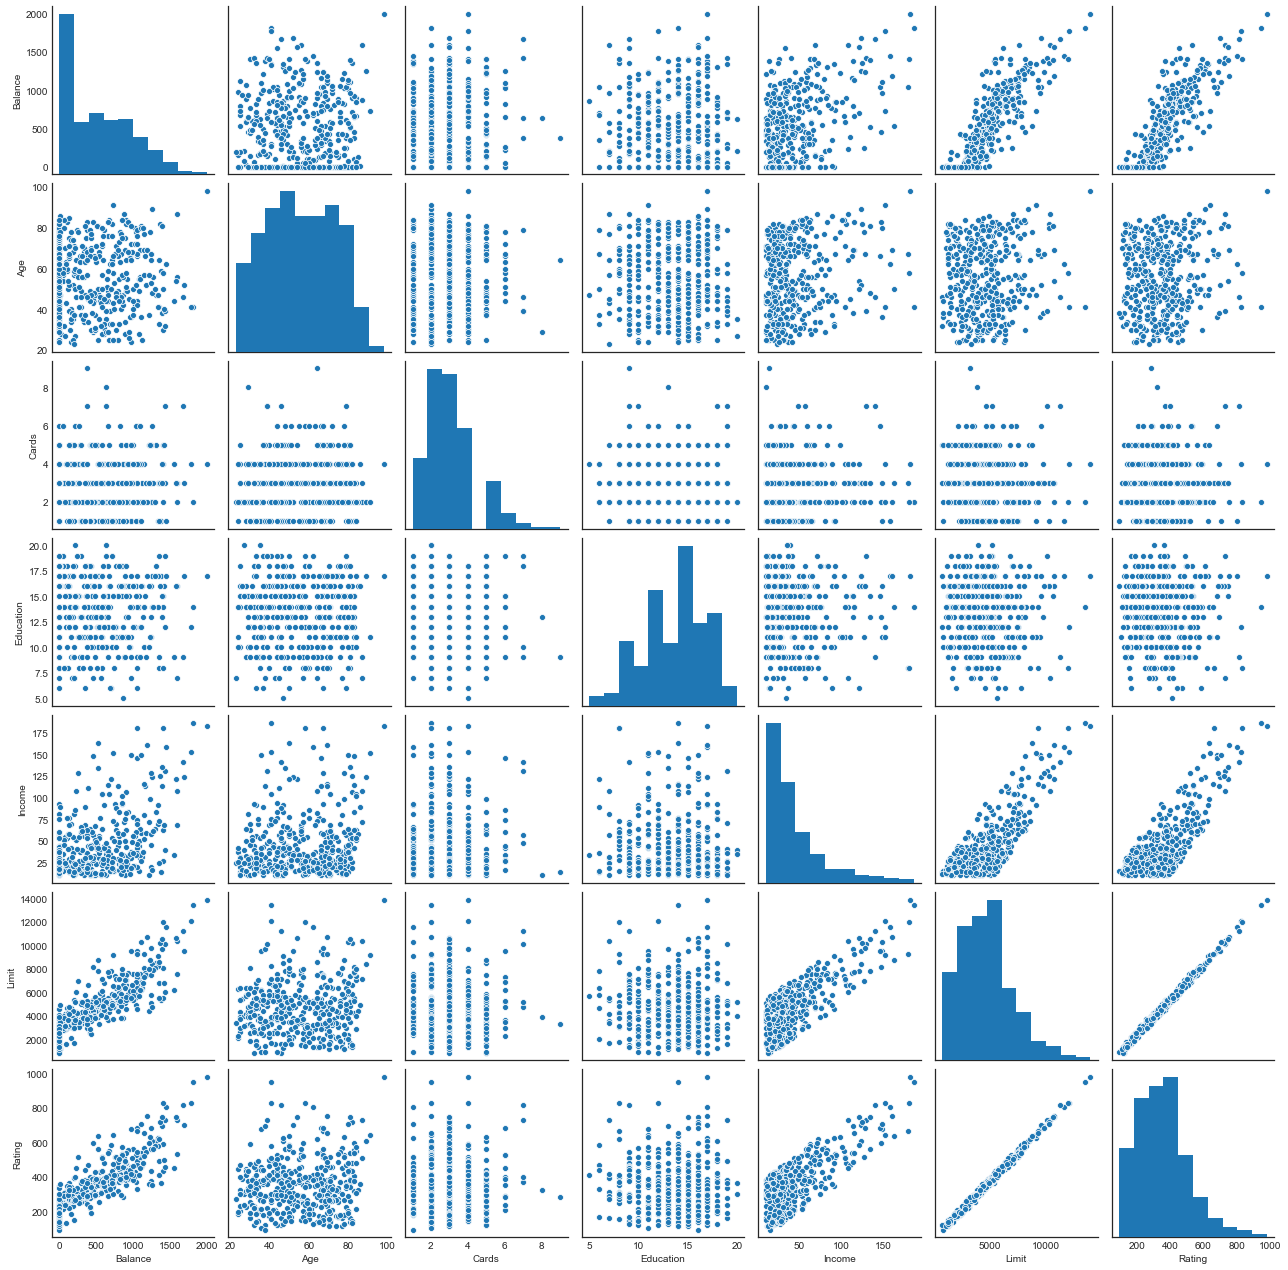

In [83]:
sns.pairplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']]);

#### "High Collinearity" 

*Collinearity* refers to the situation in which two or more predictor variables are closely related to one another. The concept of collinearity is illustrated in Figure 3.14 using the Credit data set. In the left-hand panel of Figure 3.14, the two predictors limit and age appear to have no obvious relationship.
In contrast, in the right-hand panel of Figure 3.14, the predictors
limit and rating are very highly correlated with each other, and we say
that they are **collinear**. The presence of collinearity can pose problems in the regression context, since it can be difficult to separate out the individual effects of collinear variables on the response. In other words, since limit and rating tend to increase or decrease together, it can be difficult to determine how each one separately is associated with the response, *balance*.

#### Figure 3.14

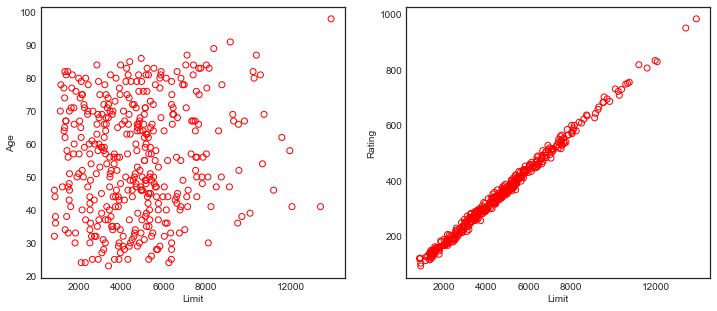

In [82]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
ax1.scatter(credit.Limit, credit.Age, facecolor='None', edgecolor='r')
ax1.set_ylabel('Age')

# Right plot
ax2.scatter(credit.Limit, credit.Rating, facecolor='None', edgecolor='r')
ax2.set_ylabel('Rating')

for ax in fig.axes:
    ax.set_xlabel('Limit')
    ax.set_xticks([2000,4000,6000,8000,12000])

### Figure 3.15
Figure 3.15 illustrates some of the difficulties that can result from collinearity.
The left-hand panel of Figure 3.15 is a contour plot of the RSS (3.22)
associated with different possible coefficient estimates for the regression
of balance on limit and age. Each ellipse represents a set of coefficients
that correspond to the same RSS, with ellipses nearest to the center taking
on the lowest values of RSS. The  dots and associated dashed lines represent the coefficient estimates that result in the smallest possible
RSS—in other words, these are the least squares estimates. The axes for
limit and age have been scaled so that the plot includes possible coefficient
estimates that are up to four standard errors on either side of the
least squares estimates. Thus the plot includes all plausible values for the
coefficients. For example, we see that the true limit coefficient is almost
certainly somewhere between 0.15 and 0.20.
In contrast, the right-hand panel of Figure 3.15 displays contour plots
of the RSS associated with possible coefficient estimates for the regression
of balance onto limit and rating, which we know to be highly collinear.
Now the contours run along a narrow valley; there is a broad range of
values for the coefficient estimates that result in equal values for RSS.
Hence a small change in the data could cause the pair of coefficient values
that yield the smallest RSS—that is, the least squares estimates—to move
anywhere along this valley. This results in a great deal of uncertainty in the
coefficient estimates. Notice that the scale for the limit coefficient now runs
from roughly −0.2 to 0.2; this is an eight-fold increase over the plausible
range of the limit coefficient in the regression with age.

In [88]:
y = credit.Balance

# Regression for left plot
X = credit[['Age', 'Limit']]#.as_matrix()
regr1 = skl_lm.LinearRegression()
regr1.fit(scale(X.astype('float'), with_std=False), y)
print('Age/Limit\n',regr1.intercept_)
print(regr1.coef_)

# Regression for right plot
X2 = credit[['Rating', 'Limit']]#.as_matrix()
regr2 = skl_lm.LinearRegression()
regr2.fit(scale(X2.astype('float'), with_std=False), y)
print('\nRating/Limit\n',regr2.intercept_)
print(regr2.coef_)

Age/Limit
 520.0150000000001
[-2.29148553  0.17336497]

Rating/Limit
 520.015
[2.20167217 0.02451438]


In [89]:
# Create grid coordinates for plotting
B_Age = np.linspace(regr1.coef_[0]-3, regr1.coef_[0]+3, 100)
B_Limit = np.linspace(regr1.coef_[1]-0.02, regr1.coef_[1]+0.02, 100)

B_Rating = np.linspace(regr2.coef_[0]-3, regr2.coef_[0]+3, 100)
B_Limit2 = np.linspace(regr2.coef_[1]-0.2, regr2.coef_[1]+0.2, 100)

X1, Y1 = np.meshgrid(B_Limit, B_Age, indexing='xy')
X2, Y2 = np.meshgrid(B_Limit2, B_Rating, indexing='xy')
Z1 = np.zeros((B_Age.size,B_Limit.size))
Z2 = np.zeros((B_Rating.size,B_Limit2.size))

Limit_scaled = scale(credit.Limit.astype('float'), with_std=False)
Age_scaled = scale(credit.Age.astype('float'), with_std=False)
Rating_scaled = scale(credit.Rating.astype('float'), with_std=False)

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z1):
    Z1[i,j] =((y - (regr1.intercept_ + X1[i,j]*Limit_scaled +
                    Y1[i,j]*Age_scaled))**2).sum()/1000000
    
for (i,j),v in np.ndenumerate(Z2):
    Z2[i,j] =((y - (regr2.intercept_ + X2[i,j]*Limit_scaled +
                    Y2[i,j]*Rating_scaled))**2).sum()/1000000

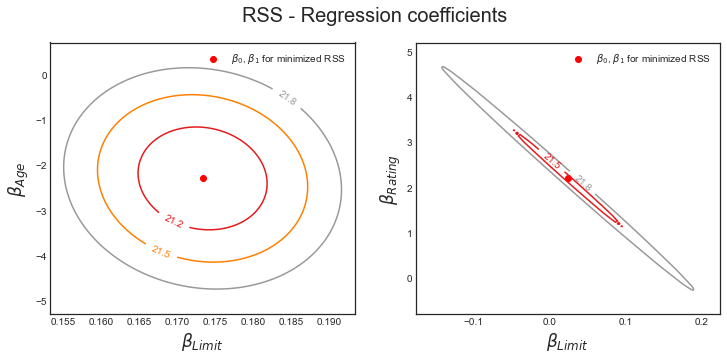

In [90]:
fig = plt.figure(figsize=(12,5))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
    
# Left plot
CS = ax1.contour(X1, Y1, Z1, cmap=plt.cm.Set1, levels=[21.25, 21.5, 21.8])
ax1.scatter(regr1.coef_[1], regr1.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax1.set_ylabel(r'$\beta_{Age}$', fontsize=17)

# Right plot
CS = ax2.contour(X2, Y2, Z2, cmap=plt.cm.Set1, levels=[21.5, 21.8])
ax2.scatter(regr2.coef_[1], regr2.coef_[0], c='r', label=min_RSS)
ax2.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax2.set_ylabel(r'$\beta_{Rating}$', fontsize=17)
ax2.set_xticks([-0.1, 0, 0.1, 0.2])

for ax in fig.axes:
    ax.set_xlabel(r'$\beta_{Limit}$', fontsize=17)
    ax.legend()

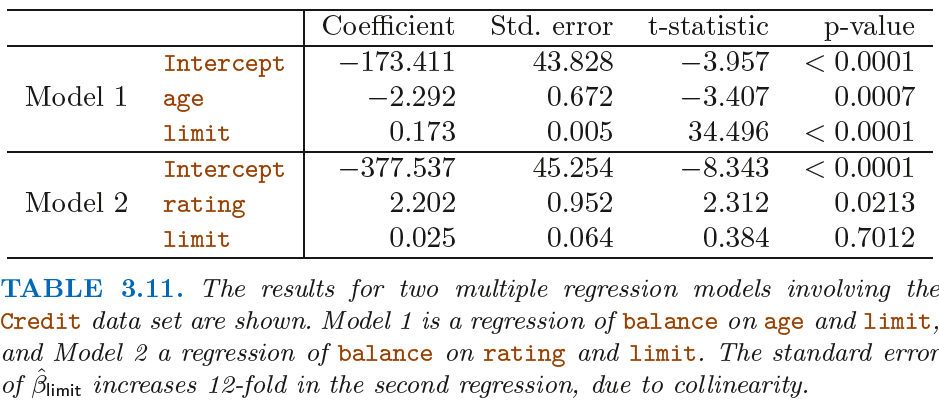

Table 3.11 compares the coefficient estimates obtained from two separate multiple regression models. The first is a regression of balance on age and limit, and the second is a regression of balance on rating and limit. In the first regression, both age and limit are highly significant with very small pvalues.
In the second, the collinearity between limit and rating has caused
the standard error for the limit coefficient estimate to increase by a factor of 12 and the p-value to increase to 0.701. In other words, the importance of the limit variable has been masked due to the presence of collinearity.
To avoid such a situation, it is desirable to identify and address potential collinearity problems while fitting the model.

-------------------------------------------------------
### 3.3.2 Qualitative/Categorical Variables

- Dummy Coding
- Interpretation of coefficients

#####  Table 3.7

![p.84](figures/ISLR-Table3.7.png)

In [91]:
est = smf.ols('Balance ~ Gender', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,509.8031,33.128,15.389,0.000,444.675,574.931
Gender[T.Female],19.7331,46.051,0.429,0.669,-70.801,110.267


### Table 3.8

In [92]:
est = smf.ols('Balance ~ Ethnicity', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
Ethnicity[T.Asian],-18.6863,65.021,-0.287,0.774,-146.515,109.142
Ethnicity[T.Caucasian],-12.5025,56.681,-0.221,0.826,-123.935,98.930


### 3.3.3 Interactions

##### Table 3.9

In [93]:
est = smf.ols('Sales ~ TV + Radio + TV*Radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
Radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:Radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


#### Figure 3.7 - Interaction between qualitative and quantative variables

In [94]:
est1 = smf.ols('Balance ~ Income + Student2', credit).fit()
regr1 = est1.params
est2 = smf.ols('Balance ~ Income + Income*Student2', credit).fit()
regr2 = est2.params

print('Regression 1 - without interaction term')
print(regr1)
print('\nRegression 2 - with interaction term')
print(regr2)

Regression 1 - without interaction term
Intercept    211.142964
Income         5.984336
Student2     382.670539
dtype: float64

Regression 2 - with interaction term
Intercept          200.623153
Income               6.218169
Student2           476.675843
Income:Student2     -1.999151
dtype: float64


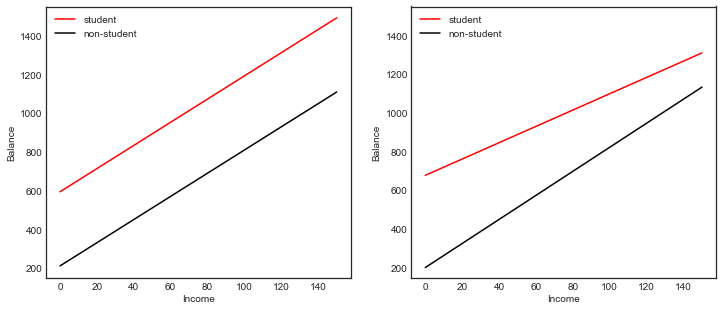

In [95]:
# Income (x-axis)
income = np.linspace(0,150)

# Balance without interaction term (y-axis)
student1 = np.linspace(regr1['Intercept']+regr1['Student2'],
                       regr1['Intercept']+regr1['Student2']+150*regr1['Income'])
non_student1 =  np.linspace(regr1['Intercept'], regr1['Intercept']+150*regr1['Income'])

# Balance with iteraction term (y-axis)
student2 = np.linspace(regr2['Intercept']+regr2['Student2'],
                       regr2['Intercept']+regr2['Student2']+
                       150*(regr2['Income']+regr2['Income:Student2']))
non_student2 =  np.linspace(regr2['Intercept'], regr2['Intercept']+150*regr2['Income'])

# Create plot
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(income, student1, 'r', income, non_student1, 'k')
ax2.plot(income, student2, 'r', income, non_student2, 'k')

for ax in fig.axes:
    ax.legend(['student', 'non-student'], loc=2)
    ax.set_xlabel('Income')
    ax.set_ylabel('Balance')
    ax.set_ylim(ymax=1550)

### 3.3.4 Non-linear relationships
#### Figure 3.8 

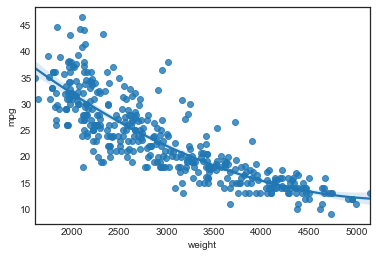

In [101]:
sns.regplot('weight', 'mpg', data=auto,fit_reg=True, order=2)

In [ ]:
# With Seaborn's regplot() you can easily plot higher order polynomials.
plt.scatter(auto.horsepower, auto.mpg, facecolors='None', edgecolors='k', alpha=.5) 
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Linear', scatter=False, color='orange')
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 2', order=2, scatter=False, color='lightblue')
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 5', order=5, scatter=False, color='g')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

### Table 3.10

In [102]:
auto['horsepower2'] = auto.horsepower**2
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,Manufacturer,horsepower2
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet,16900
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick,27225
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth,22500


In [103]:
est = smf.ols('mpg ~ horsepower + horsepower2', auto).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
horsepower2,0.0012,0.000,10.080,0.000,0.001,0.001


### 3.3.5 Outliers

##### Figure 3.9

In [105]:
regr = skl_lm.LinearRegression()

# Linear fit
X = auto.horsepower.values.reshape(-1,1)
y = auto.mpg
regr.fit(X, y)

auto['pred1'] = regr.predict(X)
auto['resid1'] = auto.mpg - auto.pred1

# Quadratic fit
X2 = auto[['horsepower', 'horsepower2']]#.as_matrix()
regr.fit(X2, y)

auto['pred2'] = regr.predict(X2)
auto['resid2'] = auto.mpg - auto.pred2

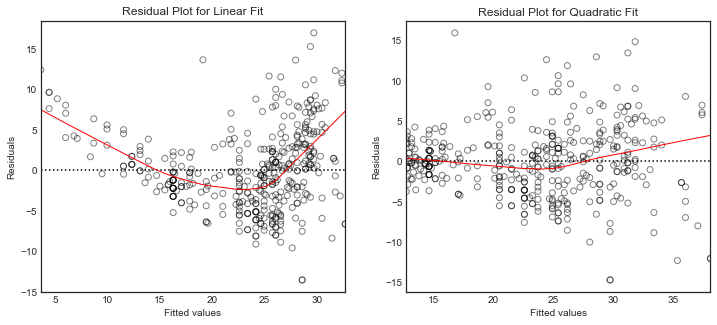

In [106]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
sns.regplot(auto.pred1, auto.resid1, lowess=True, 
            ax=ax1, line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax1.hlines(0,xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dotted')
ax1.set_title('Residual Plot for Linear Fit')

# Right plot
sns.regplot(auto.pred2, auto.resid2, lowess=True,
            line_kws={'color':'r', 'lw':1}, ax=ax2,
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted')
ax2.set_title('Residual Plot for Quadratic Fit')

for ax in fig.axes:
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')